In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load iris data
data= load_iris().data
Y=load_iris().target

In [4]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [5]:
## Optimal number of clusters
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances.append(km.inertia_)

In [6]:
## Visualize elbow plot
def elbow_plot(k,wss):
    plt.plot(k, wss, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')

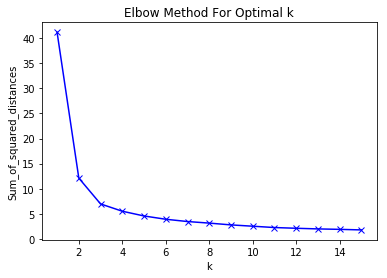

In [7]:
elbow_plot(k=K,wss=Sum_of_squared_distances) 
plt.show()  

In [8]:
## Kmeans with optinum clusters
kmeans= KMeans(n_clusters=3,random_state=2018)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2018, tol=0.0001, verbose=0)

In [9]:
op=kmeans.predict(scaled_data)

In [10]:
## Cluster Distribution
unique, counts = np.unique(op, return_counts=True)
np.vstack((unique, counts)).T

array([[ 0, 39],
       [ 1, 50],
       [ 2, 61]], dtype=int64)

In [11]:
pd.crosstab(op,Y)

col_0,0,1,2
row_0,,,
0,0,3,36
1,50,0,0
2,0,47,14


In [12]:
#from sklearn.metrics import adjusted_rand_score
#adjusted_rand_score(Y, op)  

## Profiling
data = np.c_[data,op,Y]
df=pd.DataFrame(data,columns=['sl','sw','pl','pw','cluster','target'])
df.groupby('cluster').mean()

,sl,sw,pl,pw,target
cluster,,,,,
0.0,6.846154,3.082051,5.702564,2.079487,1.923077
1.0,5.006000,3.428000,1.462000,0.246000,0.000000
2.0,5.888525,2.737705,4.396721,1.418033,1.229508
